# Stomata Camera APIv2 examples

You can see the Swagger documentation here: https://app.sigrow.com/api/v2/

We will go through some basic operations regarding the Stomata Camera functionality.

First, some basic imports:

In [1]:
import requests
import json
import numpy as np
import datetime

import IPython.display as display

# Optional function for response parsing
def pretty_print(obj):
    print(json.dumps(obj, indent=2))

Make sure that in your requests you use the correct `X-API-Key` header:

In [2]:
X_API_KEY = "your_api_key_goes_here"
# Request your API key from Sigrow via tech support

## Example 1 - getting the list of available cameras

In [3]:
cameras_response = requests.get("http://app.sigrow.com/api/v2/cameras", headers={
    "X-API-Key": X_API_KEY
}).json()

pretty_print(cameras_response)

In [4]:
selected_camera = cameras_response[0]

Let's now get the list of Persisted Points:

In [5]:
points_response = requests.get("http://app.sigrow.com/api/v2/camera/{}/points".format(selected_camera["id"]), headers={
    "X-API-Key": X_API_KEY
}).json()

pretty_print(points_response)

[
  {
    "last_updated": "2021-04-14T09:31:20", 
    "last_y_position": 106, 
    "color": "#006400", 
    "last_x_position": 103, 
    "type": "DRY_LEAF", 
    "id": 1, 
    "name": "Dry leaf"
  }, 
  {
    "last_updated": "2021-04-14T13:33:49", 
    "last_y_position": 32, 
    "color": "#bc8f8f", 
    "last_x_position": 34, 
    "type": "POINT", 
    "id": 2, 
    "name": "Upper left"
  }, 
  {
    "last_updated": "2021-04-14T13:52:16", 
    "last_y_position": 9, 
    "color": "#ff4500", 
    "last_x_position": 102, 
    "type": "POINT", 
    "id": 3, 
    "name": "Top middle"
  }, 
  {
    "last_updated": "2021-04-14T14:16:18", 
    "last_y_position": 11, 
    "color": "#ffd700", 
    "last_x_position": 165, 
    "type": "POINT", 
    "id": 4, 
    "name": "Upper right cold"
  }, 
  {
    "last_updated": "2021-04-14T14:16:24", 
    "last_y_position": 76, 
    "color": "#00ff00", 
    "last_x_position": 17, 
    "type": "POINT", 
    "id": 5, 
    "name": "Middle left"
  }, 
  {
   

## Getting the available shots for the Camera

Let's say we want to see how many images were captured between 2021-09-05 and 2021-09-06. Bear in mind the time in the query should be in UTC! (See the API documentation)

In [5]:
after = datetime.datetime.strptime("05/09/2021 00:00:01", "%d/%m/%Y %H:%M:%S")
before = datetime.datetime.strptime("06/09/2021 23:59:59", "%d/%m/%Y %H:%M:%S")

shots_response = requests.get("http://app.sigrow.com/api/v2/camera/{}/shots?after={}&before={}".format(
    selected_camera["id"], after.strftime("%Y%m%dT%H%M%SZ"), before.strftime("%Y%m%dT%H%M%SZ")
), headers={
    "X-API-Key": X_API_KEY
}).json()


pretty_print(shots_response)

Let's pick the latest one and see the source RGB image. You can also see other parameters from the time of taking the photo, like:
- PAR
- Dry Leaf temperature
- VPD
- humidity
- temperature

In [7]:
selected_shot = shots_response["shots"][-1]


shot_source_response = requests.get("http://app.sigrow.com/api/v2/camera/{}/shot/{}/source".format(
    selected_camera["id"], selected_shot["id"]
), headers={
    "X-API-Key": X_API_KEY
}).json()

pretty_print(shot_source_response)

{
  "climate_sensor_par": 0, 
  "climate_sensor_dry_leaf_temperature": 18.87, 
  "climate_sensor_remote_id": 20512, 
  "id": 1325006, 
  "sources": [
    {
      "url": "https://sigrow-thermal-development.ams3.digitaloceanspaces.com/source/301-fa1509d0ff8c391a3ded7318b5ac2ca9e01311f13ee856fe2f923cb8/thermal/2021-09-06/301-2021-09-06-22-45-35.thermal.npy", 
      "size_bytes": 76928, 
      "type": "THERMAL_NUMPY"
    }, 
    {
      "url": "https://sigrow-thermal-development.ams3.digitaloceanspaces.com/source/301-fa1509d0ff8c391a3ded7318b5ac2ca9e01311f13ee856fe2f923cb8/rgb/2021-09-06/301-2021-09-06-22-45-35.rgb.jpg", 
      "size_bytes": 108764, 
      "type": "RGB_JPG"
    }
  ], 
  "date": {
    "in_centrals_timezone": "2021-09-06T22:45:35+00:00", 
    "in_gmt_timezone": "2021-09-06T22:45:35+00:00"
  }, 
  "climate_sensor_vpd": 0.4, 
  "climate_sensor_humidity": 82.1, 
  "climate_sensor_temperature": 18.13
}


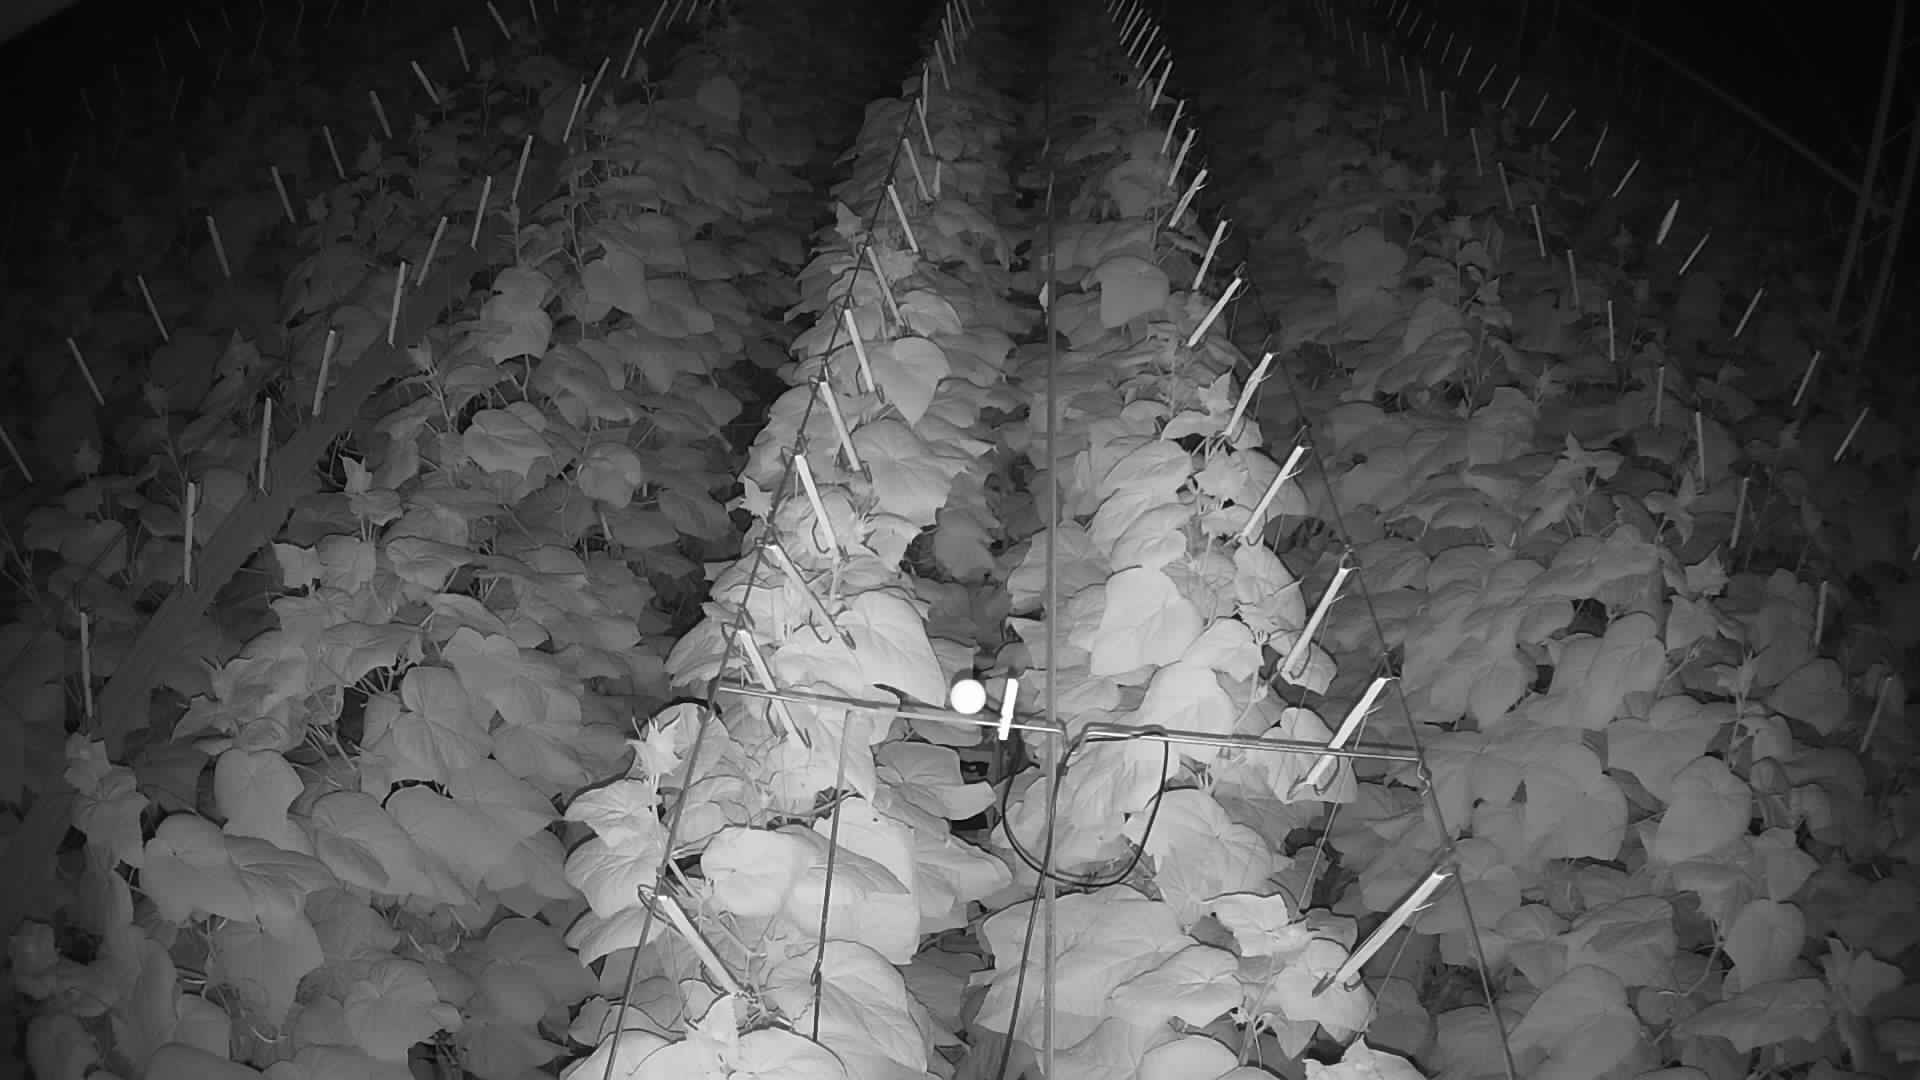

In [8]:
def get_rgb_source(item):
    return item["type"] == "RGB_JPG"

rgb_source = list(filter(get_rgb_source, shot_source_response["sources"]))[0] 

display.Image(requests.get(rgb_source["url"]).content)

We can also get the Stomata+ and Temperature+ images that came out of processing of this image, as well as the raw temperature readings. Along with the processed images, you also get the Stomata and Temperature values for Persisted Points.

In [9]:
shot_processed_response = requests.get("http://app.sigrow.com/api/v2/camera/{}/shot/{}/processed".format(
    selected_camera["id"], selected_shot["id"]
), headers={
    "X-API-Key": X_API_KEY
}).json()

pretty_print(shot_processed_response)


{
  "date": {
    "in_centrals_timezone": "2021-09-06T22:45:35+00:00", 
    "in_gmt_timezone": "2021-09-06T22:45:35+00:00"
  }, 
  "processed": [
    {
      "url": "https://sigrow-thermal-development.ams3.digitaloceanspaces.com/processed/301-fa1509d0ff8c391a3ded7318b5ac2ca9e01311f13ee856fe2f923cb8/thermal/2021-09-06/i206x156/r0x0/301-2021-09-06-22-45-35.png", 
      "height": 156, 
      "width": 206, 
      "points": [
        {
          "y": 106, 
          "x": 103, 
          "id": 1, 
          "value": 16.78
        }, 
        {
          "y": 32, 
          "x": 34, 
          "id": 2, 
          "value": 16.95
        }, 
        {
          "y": 9, 
          "x": 102, 
          "id": 3, 
          "value": 16.54
        }, 
        {
          "y": 11, 
          "x": 165, 
          "id": 4, 
          "value": 16.75
        }, 
        {
          "y": 76, 
          "x": 17, 
          "id": 5, 
          "value": 17.48
        }, 
        {
          "y": 71, 
       

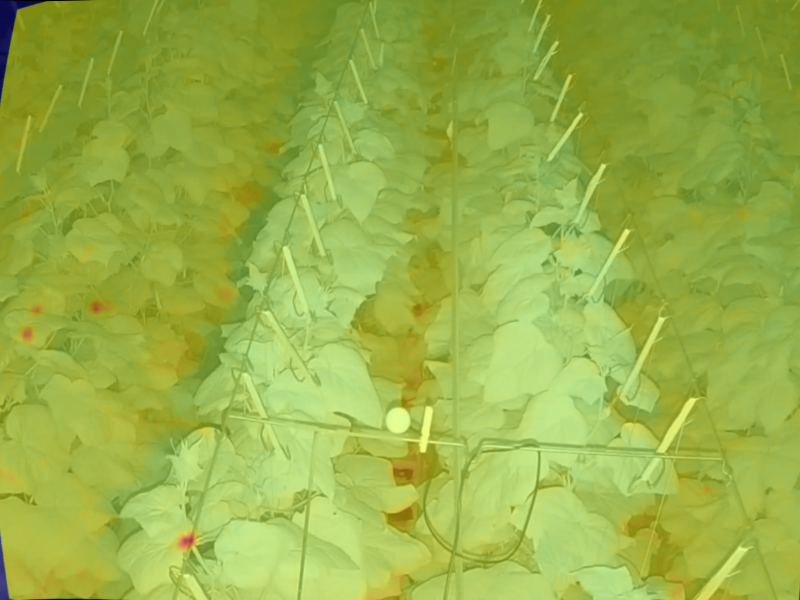

In [10]:
def get_low_res(item):
    return item["height"] == 156 and item["width"] == 206

def get_high_res(item):
    return item["height"] == 600 and item["width"] == 800

def get_temperature_plus_low_res_processed(item):
    return get_low_res(item) and item["type"] == "THERMAL_PLUS_PNG"

def get_temperature_plus_high_res_processed(item):
    return get_high_res(item) and item["type"] == "THERMAL_PLUS_PNG"


thermal_plus_high_res = list(filter(get_temperature_plus_high_res_processed, shot_processed_response["processed"]))[0] 

display.Image(requests.get(thermal_plus_high_res["url"]).content)


So to see eg. the stomata value of Persisted Point ID 2 in this image, you can do the following:

In [11]:
def get_stomata_json_low_res(item):
    return get_low_res(item) and item["type"] == "STOMATA_JSON"

def get_temperature_json_low_res(item):
    return get_low_res(item) and item["type"] == "THERMAL_JSON"

def get_point_id_2(item):
    return item["id"] == 2

stomata_json_data = list(filter(get_stomata_json_low_res, shot_processed_response["processed"]))[0] 
stomata_json_persisted_point_2 = list(filter(get_point_id_2, stomata_json_data["points"]))[0] 

temperature_json_data = list(filter(get_temperature_json_low_res, shot_processed_response["processed"]))[0] 
temperature_json_persisted_point_2 = list(filter(get_point_id_2, temperature_json_data["points"]))[0] 

print("Persisted Point ID 2 set at X:{}, Y:{}".format(stomata_json_persisted_point_2["x"], stomata_json_persisted_point_2["y"]))

print("Persisted Point ID 2 stomata value: {}".format(stomata_json_persisted_point_2["value"]))
print("Persisted Point ID 2 temperature value: {}".format(temperature_json_persisted_point_2["value"]))

Persisted Point ID 2 set at X:34, Y:32
Persisted Point ID 2 stomata value: 0.05
Persisted Point ID 2 temperature value: 16.95


You can also get a corrected stomata (and temperature) value for any pixel point on the image, say, (90, 90):

In [12]:
x = 90
y = 90

stomata_array = requests.get(stomata_json_data["url"]).json()

print("Stomata value at X:{}, Y:{}: {}".format(x, y, stomata_array[y][x])) # remember that vertical (y) index comes first!

Stomata value at X:90, Y:90: 0.1
